In [5]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 3.1 MB/s eta 0:00:13
   - -------------------------------------- 1.3/39.0 MB 3.3 MB/s eta 0:00:12
   -- ------------------------------------- 2.1/39.0 MB 3.3 MB/s eta 0:00:12
   -- ------------------------------------- 2.6/39.0 MB 3.3 MB/s eta 0:00:12
   -- ------------------------------------- 2.6/39.0 MB 3.3 MB/s eta 0:00:12
   ---- ----------------------------------- 3.9/39.0 MB 3.1 MB/s eta 0:00:12
   ---- ----------------------------------- 4.7/39.0 MB 3.2 MB/s eta 0:00:11
   ----- ---------------------------------- 5.2/39.0 MB 3.1 MB/s eta 0:00:11
   ------ --------------------------------- 6.0/39.0 MB 3.2 MB/s eta 0:00:11
   ------ --------------------------------- 6.8/39.0 MB 3.3 MB/s eta 0:00:10
   -------- ------------------------------- 7.9/39.0 MB 3.3 MB/s eta 0:00:10
   -------- -

In [18]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize
import cv2

In [8]:
dataset = io.loadmat('./Data_hoda_full.mat')
dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 30 20:26:30 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Data': array([[array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0,   0,   0,   0],
                [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0,   0,   0,   0],
                [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0, 255, 255,   0],
                [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                   0,   0,   0, 255, 255, 255, 255],
                [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
                   0,   0, 255, 255, 255, 255,   0],
                [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                   0, 255, 255, 255, 255, 255,   0],
                [255, 255, 255, 255,   0,  

In [9]:
#test and training set
X_train_orginal = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])
X_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

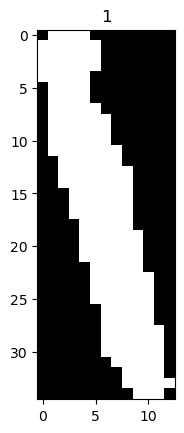

In [13]:
plt.imshow(X_train_orginal[999], cmap='gray')
plt.title(y_train[999]);

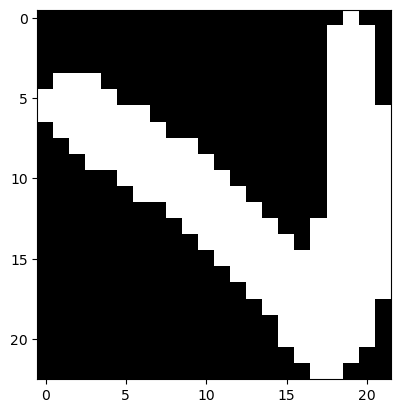

Label 793th image is: 7


In [16]:
i=793
image = X_train_orginal[i]
label = y_train[i]
plt.imshow(image, cmap='gray')
plt.show()
print("Label {}th image is: {}".format(i, label))

In [19]:
#resize
X_train_5by5 = [cv2.resize(img, dsize=(5, 5)) for img in X_train_orginal]
X_test_5by_5 = [cv2.resize(img, dsize=(5, 5)) for img in X_test_original]

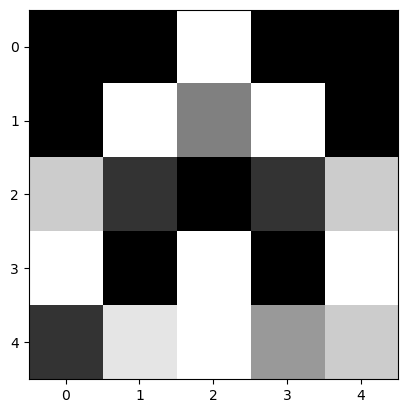

In [20]:
image = X_train_5by5[1]
plt.imshow(image, cmap='gray')
plt.show()

In [26]:
#reshape
X_train = np.reshape(X_train_5by5, [-1,25])
X_test = np.reshape(X_test_5by_5, [-1,25])

In [27]:
X_train.shape

(1000, 25)

In [28]:
X_test.shape

(200, 25)

In [2]:
from sklearn.neighbors import KNeighborsClassifier



In [5]:
from dataset import load_hoda 

In [6]:
X_train, y_train, X_test, y_test=load_hoda()

In [7]:
X_train.shape


(1000, 25)

In [8]:
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
kn.predict([X_test[10]])


array([0], dtype=uint8)

In [10]:
sample = 24
x = [X_test[sample]]

predicted_class = kn.predict(x)

print("Sample {} is a {}, and your prediction is: {}."
      .format(sample, y_test[sample], predicted_class[0]))


Sample 24 is a 9, and your prediction is: 9.


In [11]:
print (kn.predict_proba(x))

[[0.         0.         0.         0.         0.         0.
  0.33333333 0.         0.         0.66666667]]


In [13]:
pred_classes = kn.predict(X_test)
true_classes = y_test

print("Predicted classes:")
print(pred_classes)
print("True classes:")
print(true_classes)

Predicted classes:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 3 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 2 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 7 6 2 4 1 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 7 3 5 5 0 0 2 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 1 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 5 3 8 9 6 7 7 2 3 0 1 4 9 5]
True classes:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


In [14]:
acc = kn.score(X_test, y_test)
print ("Accuracy is %.2f %%" %(acc*100))

Accuracy is 96.00 %


In [16]:
pip install mglearn

   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ------------------ --------------------- 262.1/581.4 kB ? eta -:--:--
   ---------------------------------------- 581.4/581.4 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


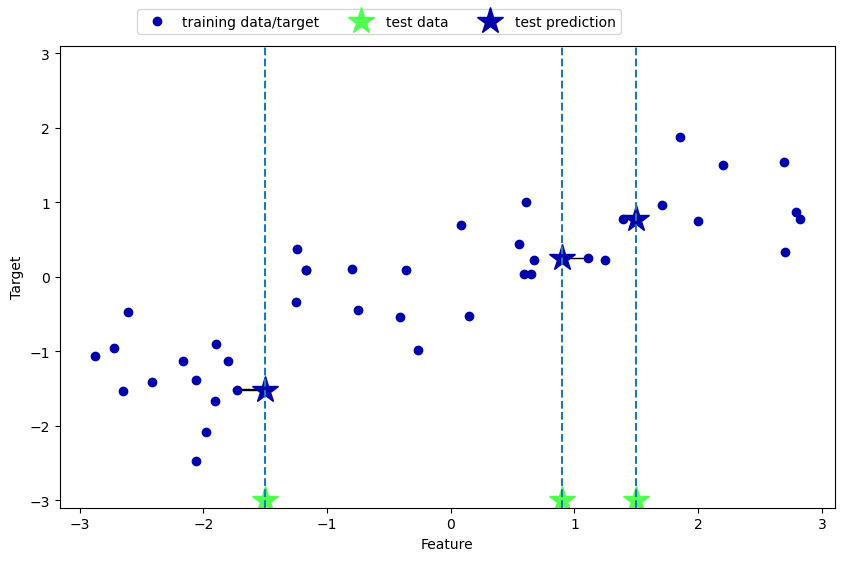

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()


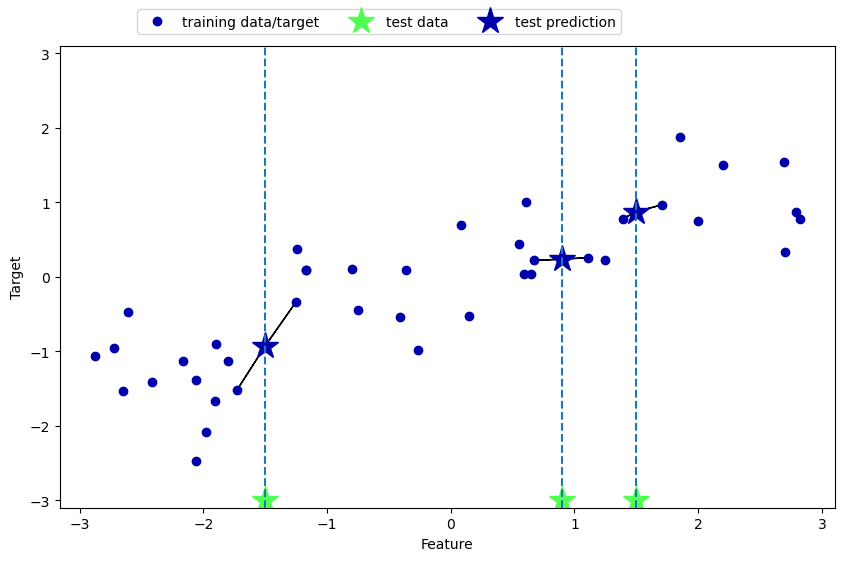

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=2)
plt.show()


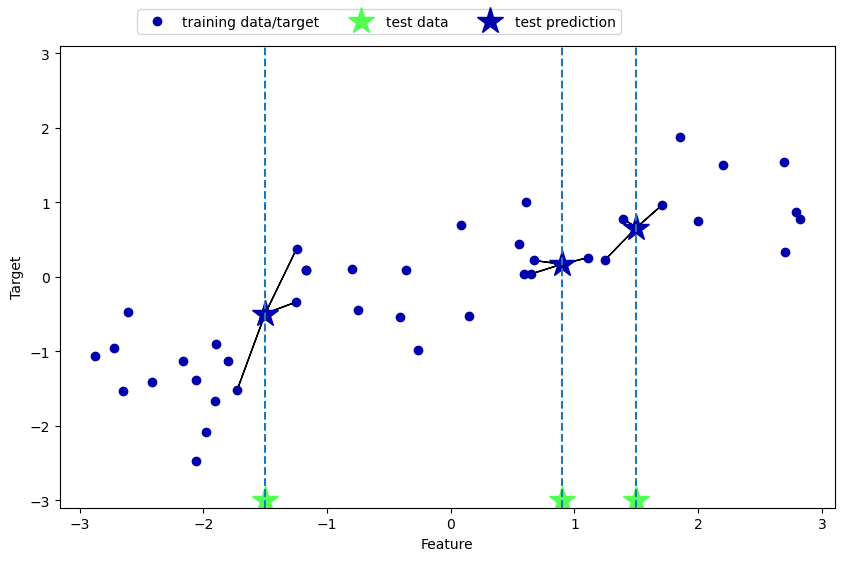

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()


In [21]:
X, y = mglearn.datasets.make_wave(n_samples=40)


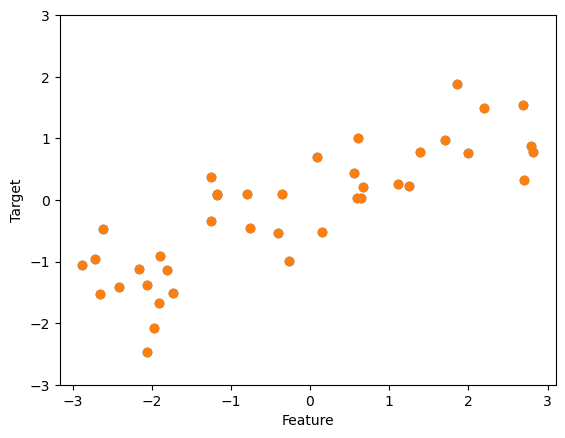

In [23]:

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data
reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [25]:
print("Test set predictions:\n" , reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [27]:
print("Test set R2:{:.2f}".format(reg.score(X_test,y_test )))

Test set R2:0.83


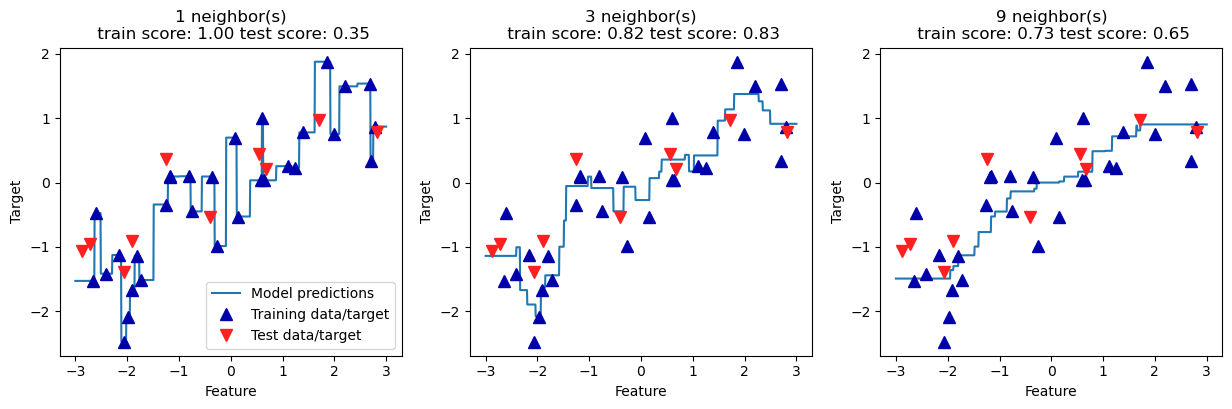

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # Make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors,
            reg.score(X_train, y_train),
            reg.score(X_test, y_test)
        )
    )
    
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best");
plt.show()
